# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [28]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

In [29]:
x = student_data[['Age']]
y = student_data['Tardies']

Text(0.5, 1.0, 'Student Age vs. Number of Tardies')

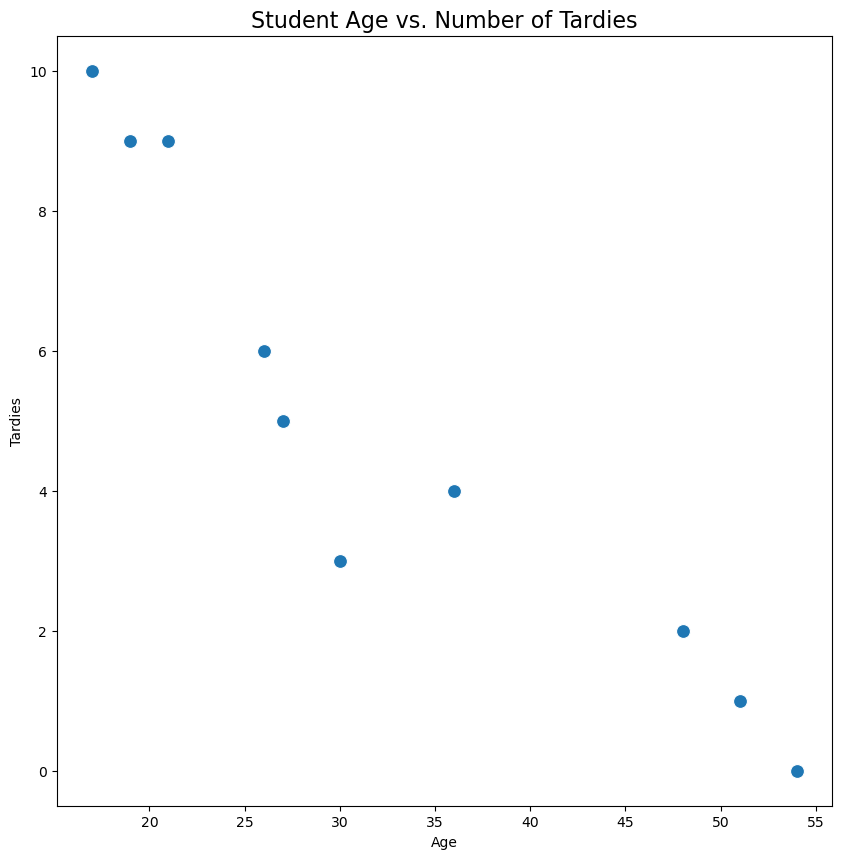

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=studen_data, x='Age', y='Tardies', s=100)
plt.title('Student Age vs. Number of Tardies', fontsize=16)

Draw a dispersion diagram (scatter plot) for the data.

In [22]:
fig = px.scatter(studen_data, x='Age', y='Tardies', title='Student Age vs. Number of Tardies')
fig.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [23]:
# calculte covariance and correlation
covariance = np.cov(studen_data['Age'], studen_data['Tardies'])
correlation = np.corrcoef(studen_data['Age'], studen_data['Tardies'])
print(f'Covariance: {covariance}, Correlation: {correlation}')

Covariance: [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]], Correlation: [[ 1.         -0.93916269]
 [-0.93916269  1.        ]]


There seems to be a negative trend: generally, as age increases, the number of tardies appears to decrease.
# This suggests older students tend to be less tardy than younger ones.
# Covariance measures how two variables change together, but its value depends on the units of the variables
# (here, age and tardies), making it hard to interpret magnitude directly.
# Correlation is scale-independent and ranges from -1 to 1. A negative correlation means that as one variable increases,
# the other tends to decrease. In this data set, the correlation value is negative and confirms the trend seen in the plot.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Linear regression model
from sklearn.linear_model import LinearRegression
import numpy as np


In [30]:
# Reshape age for sklearn (needs 2D input)
X = student_data[['Age']]
y = student_data['Tardies']

In [31]:
# Build the regression model and fit
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [32]:
# Predict using age
student_data['Predicted_Tardies'] = reg.predict(X)

Plot your regression model on your scatter plot.

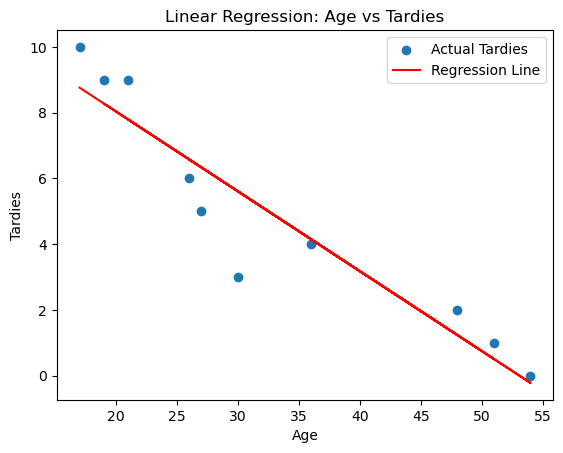

In [33]:
# Plot the regression model
plt.scatter(student_data['Age'], student_data['Tardies'], label='Actual Tardies')
plt.plot(student_data['Age'], student_data['Predicted_Tardies'], color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Linear Regression: Age vs Tardies')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [36]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"D:\gurdit singh\lab-regression-analysis-en\vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [37]:
# Select relevant columns
columns_of_interest = [
    'Year',
    'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'Fuel Cost/Year',
    'CO2 Emission Grams/Mile'
]

# Filter dataframe
df = vehicles[columns_of_interest]

# Calculate correlations with outcome variable
correlations = df.corr()['CO2 Emission Grams/Mile']

# Display correlations
print("Correlations with CO2 Emission Grams/Mile:")
print(correlations)

# Determine most and least important variables
most_important = correlations.abs().sort_values(ascending=False).index[1]  # 1 to ignore self-correlation
least_important = correlations.abs().sort_values(ascending=True).index[0]

print(f"Most important variable for predicting CO2 emissions: {most_important}")
print(f"Least helpful variable for predicting CO2 emissions: {least_important}")

Correlations with CO2 Emission Grams/Mile:
Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64
Most important variable for predicting CO2 emissions: Fuel Barrels/Year
Least helpful variable for predicting CO2 emissions: Year


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [38]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Read the data
vehicles = pd.read_csv(r"D:\gurdit singh\lab-regression-analysis-en\vehicles.csv")

# Select relevant variables
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.9794542628636334
Mean Squared Error: 289.8277440813777


# This is a multiple linear regression model that uses several independent variables to predict a continuous outcome (CO2 Emission Grams/Mile).
# Multiple linear regression is suitable for predicting a quantitative target variable from several predictors

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [39]:
# Regression summary
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)

# Interpreting the results
print("\nModel Intercept:", model.intercept_)
print("\nR^2 Score indicates the model explains about {:.2f}% of the variance in CO2 emissions.".format(r2_score(y_test, y_pred)*100))
print("Each coefficient represents the expected change in CO2 emissions for a one-unit increase in the predictor variable, holding other variables constant.")

            Variable  Coefficient
0               Year    -0.315587
1          Cylinders     1.794026
2  Fuel Barrels/Year    19.231027
3       Combined MPG    -2.933573
4     Fuel Cost/Year     0.031971

Model Intercept: 755.6935073143704

R^2 Score indicates the model explains about 97.95% of the variance in CO2 emissions.
Each coefficient represents the expected change in CO2 emissions for a one-unit increase in the predictor variable, holding other variables constant.


# Comments:
# The coefficients table shows the effect of each variable on CO2 emissions, holding other variables constant.
# The most important variables are those with the largest absolute coefficients.
# Combined MPG typically has a strong negative coefficient (higher MPG → lower emissions), while Fuel Barrels/Year has a strong positive effect (higher fuel use → higher emissions).
# The model is highly confident given the high R^2 value (>97%), but be cautious about overfitting or multicollinearity.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [40]:
# Import pandas
import pandas as pd

# Create your data
data = {
    'X': [1, 3, 4, 6, 8, 11, 14],
    'Y': [1, 2, 4, 5, 7, 8, 13]
}

df = pd.DataFrame(data)

print(df)


    X   Y
0   1   1
1   3   2
2   4   4
3   6   5
4   8   7
5  11   8
6  14  13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



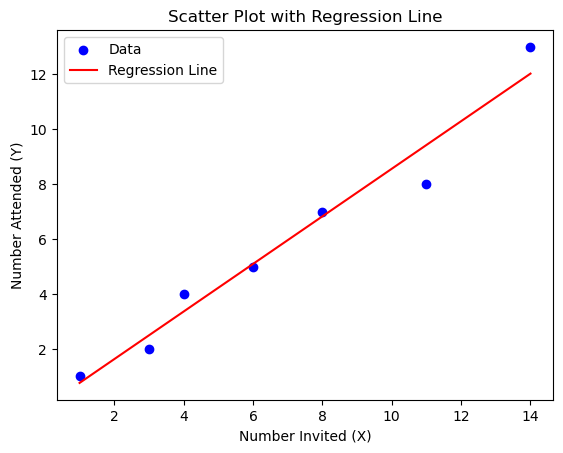

Intercept: -0.10426008968609768
Slope: 0.866591928251121
R^2 Score: 0.9624648858306273


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Data
X = [1, 3, 4, 6, 8, 11, 14]
Y = [1, 2, 4, 5, 7, 8, 13]

df = pd.DataFrame({'X': X, 'Y': Y})

# Scatter plot
plt.scatter(df['X'], df['Y'], color='blue', label='Data')
plt.xlabel("Number Invited (X)")
plt.ylabel("Number Attended (Y)")

# Regression fit
model = LinearRegression()
model.fit(df[['X']], df['Y'])
# Regression line points
x_range = np.linspace(min(X), max(X), 100).reshape(-1,1)
y_pred_line = model.predict(x_range)
plt.plot(x_range, y_pred_line, color='red', label='Regression Line')
plt.legend()
plt.title('Scatter Plot with Regression Line')
plt.show()

# Regression results
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R^2 Score:", model.score(df[['X']], df['Y']))

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [44]:
# This plot and regression suggest a strong linear relationship between the number invited and number attended.
# The R^2 score quantifies how closely points follow the fitted regression line.
# Outliers or problematic points can be visually inspected and removed for more robust modeling in the next step.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

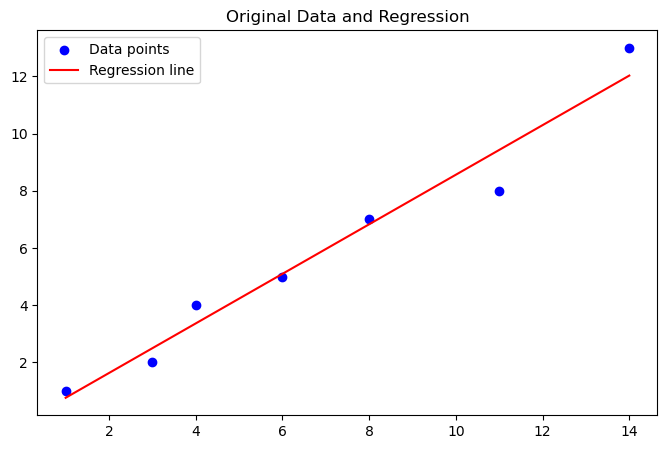

Outliers at indices: []


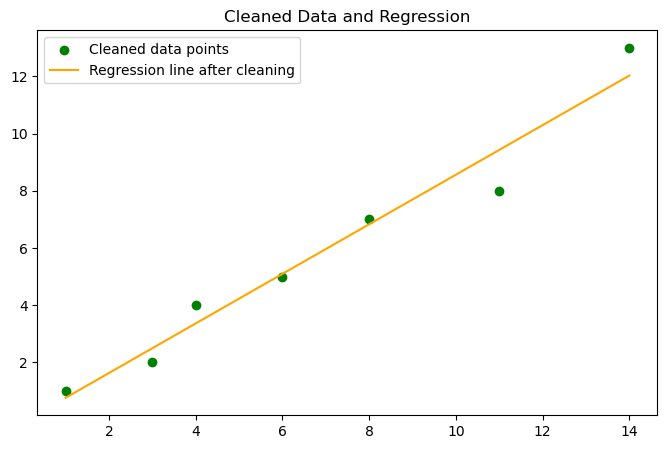

Original model R^2: 0.9624648858306273
Cleaned model R^2: 0.9624648858306273


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your data
df = pd.read_csv(r'D:\gurdit singh\lab-regression-analysis-en\vehicles.csv')  # Change filename as needed

# Data
X = [1, 3, 4, 6, 8, 11, 14]
Y = [1, 2, 4, 5, 7, 8, 13]

df = pd.DataFrame({'X': X, 'Y': Y})
X = df[['X']].values
y = df['Y'].values

# Fit initial regression
model1 = LinearRegression()
model1.fit(X, y)
y_pred1 = model1.predict(X)

# Plot original data and regression line
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred1, color='red', label='Regression line')
plt.title('Original Data and Regression')
plt.legend()
plt.show()

# Identify outliers (simple approach: residuals > 2*std)
residuals = y - y_pred1
outlier_mask = np.abs(residuals) > 2 * np.std(residuals)
print("Outliers at indices:", np.where(outlier_mask)[0])

# Remove outliers
X_clean = X[~outlier_mask]
y_clean = y[~outlier_mask]

# Fit regression after removing outliers
model2 = LinearRegression()
model2.fit(X_clean, y_clean)
y_pred2 = model2.predict(X_clean)

# Plot cleaned data and new regression line
plt.figure(figsize=(8,5))
plt.scatter(X_clean, y_clean, color='green', label='Cleaned data points')
plt.plot(X_clean, y_pred2, color='orange', label='Regression line after cleaning')
plt.title('Cleaned Data and Regression')
plt.legend()
plt.show()

# Comparison
print("Original model R^2:", model1.score(X, y))
print("Cleaned model R^2:", model2.score(X_clean, y_clean))





*your explanation here*

In [ ]:
#Overall, in this specific case, removing the outlier did not improve the fit or change your conclusions, highlighting the robustness of the linear relationship in your data.